# Project 13 : Predict A Doctor's Consultation Fee (Dynamic)

In [1]:
#data analysis libraries 
import pandas as pd
import numpy as np
import datetime

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the train and test

train_data = pd.read_excel('Data/Doctor_fee_consultation/Final_Train.xlsx')
test_data = pd.read_excel('Data/Doctor_fee_consultation/Final_Test.xlsx')

In [3]:
train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [5]:
# Shape of train and test
print(train_data.shape, test_data.shape)

(5961, 7) (1987, 6)


Now from here we first Analyze the Train_data and the same process is repeated for Test data. If we concate train and test data then there is a problem of data leakage. So, for that reason we don't combine our data set and analyze the data set seperately

## Train_Data

In [6]:
# check the shape of the train data
train_data.shape

(5961, 7)

In [7]:
# Check the columns of the train data
train_data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [8]:
# Checkign the null values in the train data
train_data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [9]:
# Checking th percentage of the null values
round(train_data.isnull().sum()/len(train_data)*100,2)

Qualification          0.00
Experience             0.00
Rating                55.39
Place                  0.42
Profile                0.00
Miscellaneous_Info    43.95
Fees                   0.00
dtype: float64

In [10]:
# Checking the information of train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [11]:
# Checking the no. of Uniqueness in the object datatype of train dataset

for i in train_data.columns:
    if train_data[i].dtype == 'object':
        print('%s : %s' %(i, train_data[i].nunique()))

Qualification : 1420
Experience : 64
Rating : 51
Place : 877
Profile : 6
Miscellaneous_Info : 2998


In [12]:
# Extracting the interger value from the Experience Column

train_data['Experience'] = train_data['Experience'].str.split().str[0].astype('int')

In [13]:
# Filling the Nan value with mode in Place

# Extract cities from Place column
train_data["Place"].fillna(train_data['Place'].mode()[0],inplace=True)

In [14]:
# Spliting the place into Area and City
train_data["Place"] = train_data["Place"].str.split(",")
train_data["City"] = train_data["Place"].str[-1]
train_data["Area"] = train_data["Place"].str[0]

In [15]:
# Check the uniqueness in City Column
train_data['City'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'e'], dtype=object)

In [16]:
train_data[train_data.City == 'e']

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Area
3980,BDS,23,NaN,[e],Dentist,NaN,250,e,e


In [17]:
train_data.loc[3980]

Qualification             BDS
Experience                 23
Rating                    NaN
Place                     [e]
Profile               Dentist
Miscellaneous_Info        NaN
Fees                      250
City                        e
Area                        e
Name: 3980, dtype: object

Clearly its a one off record. Lets mark the Place, city and locality as missing instead of deleting the record.

In [18]:
# Dropping the Place Column as it has not use
train_data.drop(['Place'], axis=1, inplace=True)

In [19]:
train_data.loc[3980, 'City'] = train_data['City'].mode()[0]
train_data.loc[3980, 'Area'] = train_data['Area'].mode()[0]

In [20]:
train_data["City"].fillna(train_data['City'].mode()[0],inplace=True)
train_data["Area"].fillna(train_data['Area'].mode()[0],inplace=True)

In [21]:
train_data['Rating'].unique()

array(['100%', '98%', nan, '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%'], dtype=object)

In [22]:
# Filling the Nan value with negative value
train_data["Rating"].fillna("-50%",inplace=True)

In [23]:
# Removing the % symbol from the Rating column

train_data['Rating'] = train_data['Rating'].str[:-1].astype('int')

In [24]:
train_data['Rating'].unique()

array([100,  98, -50,  99,  79,  95,  97,  94,  88,  90,  80,  93,  36,
        78,  87,  96,  82,  89,  74,  86,  92,  83,  76,  85,  56,  91,
        68,  60,  75,  69,  73,  67,  77,  33,  55,  71,  84,  45,  63,
        72,  81,  62,  57,   7,  48,  40,  70,  64,  65,  47,  58,  53])

In [25]:
# # replacing the -50 with median of the Rating

train_data['Rating']= train_data['Rating'].replace(-50,np.nan)

In [26]:
train_data['Rating'] = train_data['Rating'].fillna(train_data['Rating'].median()).astype('int')

In [27]:
train_data['Rating'].unique()

array([100,  98,  97,  99,  79,  95,  94,  88,  90,  80,  93,  36,  78,
        87,  96,  82,  89,  74,  86,  92,  83,  76,  85,  56,  91,  68,
        60,  75,  69,  73,  67,  77,  33,  55,  71,  84,  45,  63,  72,
        81,  62,  57,   7,  48,  40,  70,  64,  65,  47,  58,  53])

In [28]:
# Checking the Miscellaneous_Info for train_data
train_data['Miscellaneous_Info']

0                    100% 16 Feedback Kakkanad, Ernakulam
1                   98% 76 Feedback Whitefield, Bangalore
2                                                     NaN
3       Bannerghatta Road, Bangalore ₹250 Available on...
4                   100% 4 Feedback Keelkattalai, Chennai
                              ...                        
5956              98% 45 Feedback Basavanagudi, Bangalore
5957                                                  NaN
5958        97% 11 Feedback Greater Kailash Part 2, Delhi
5959    General Medical Consultation Viral Fever Treat...
5960    Acrylic Partial Denture Crowns and Bridges Fix...
Name: Miscellaneous_Info, Length: 5961, dtype: object

In [29]:
# As the above Miscellaneous_Info is unwanted which is not related to Fees, So dropping the column
train_data.drop('Miscellaneous_Info',axis=1,inplace=True)

In [30]:
train_data.head()

,Qualification,Experience,Rating,Profile,Fees,City,Area
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9,97,ENT Specialist,300,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12,97,Ayurveda,250,Bangalore,Bannerghatta Road
4,BAMS,20,100,Ayurveda,250,Chennai,Keelkattalai


In [31]:
# CHecking the Uniqueness in City Column
train_data['City'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram'], dtype=object)

### Visualization

#### City vs Fees

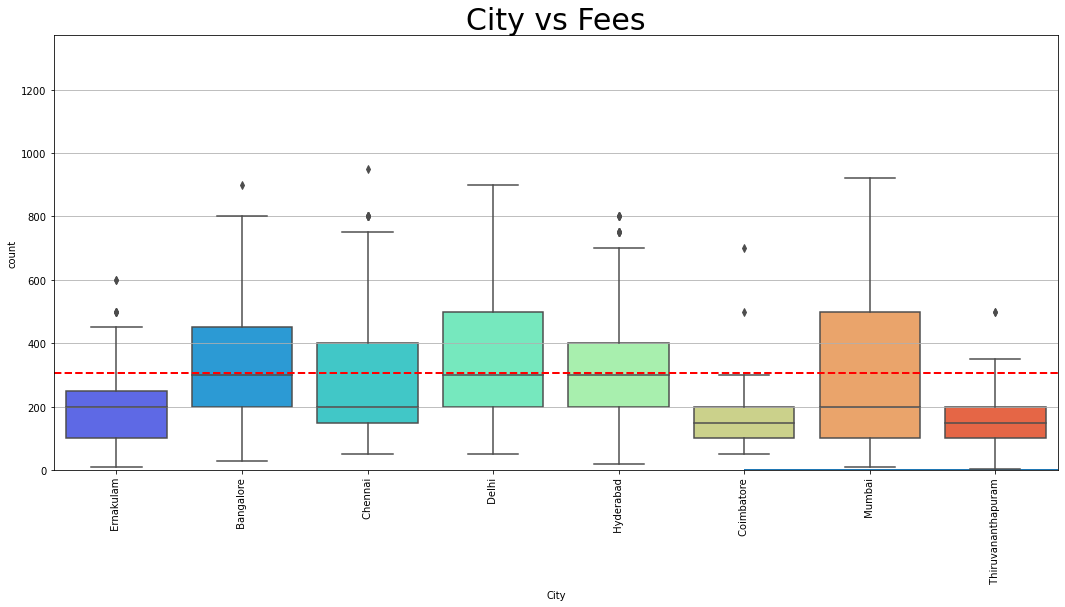

In [32]:
# City vs Fees

plt.figure(figsize=(18,8))
price = train_data['Fees'].hist(bins=60)
mean_val = np.mean(train_data['Fees'])
sns.boxplot(y='Fees', x='City', data=train_data, palette='rainbow')
plt.axhline(mean_val, linewidth=2, color='red', linestyle='dashed')
plt.title('City vs Fees', fontsize=30)
plt.xlabel('City')
plt.ylabel('count')
plt.xticks(rotation='vertical')
plt.show()

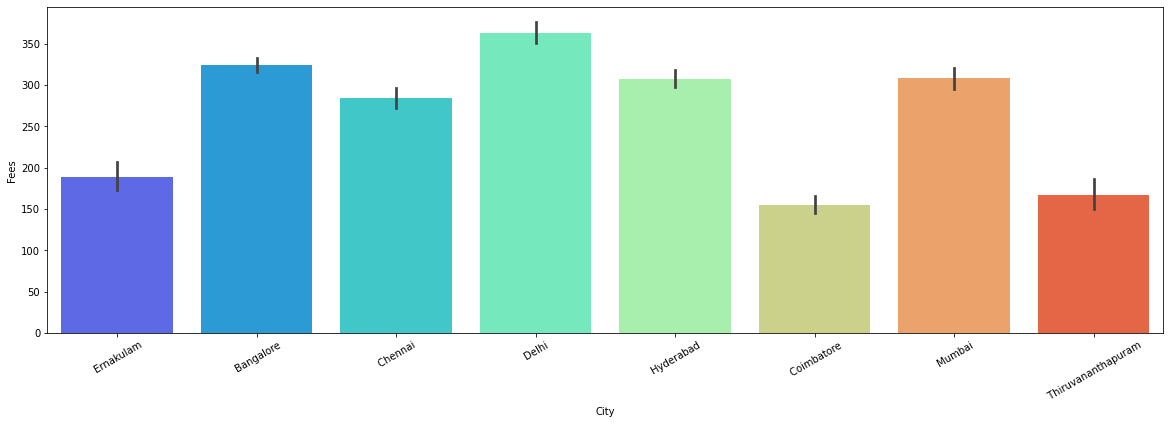

In [33]:
plt.figure(figsize=(20,6))
sns.barplot(x='City', y='Fees', data=train_data, palette='rainbow')
plt.xticks(rotation=30)
plt.show()

Observation:

1. From above graph, we can see that City- Delhi have the highest Fees.

2. There are also less outliers present in ernakulam, Hyderbad, Coimbatore, Chennai which nees to be removed

#### Experience vs Fees

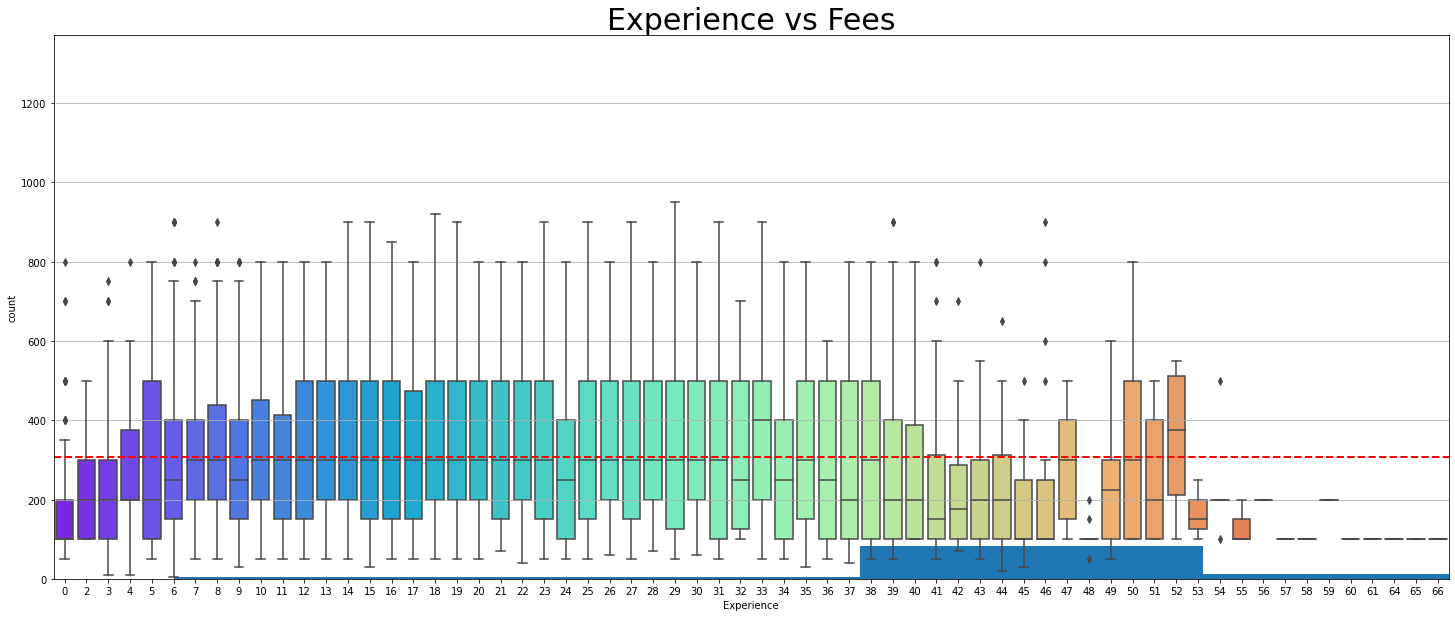

In [34]:
# Experience vs Fees

plt.figure(figsize=(25,10))
price = train_data['Fees'].hist(bins=60)
mean_val = np.mean(train_data['Fees'])
sns.boxplot(y='Fees', x='Experience', data=train_data, palette='rainbow')
plt.axhline(mean_val, linewidth=2, color='red', linestyle='dashed')
plt.title('Experience vs Fees', fontsize=30)
plt.xlabel('Experience')
plt.ylabel('count')
plt.show()

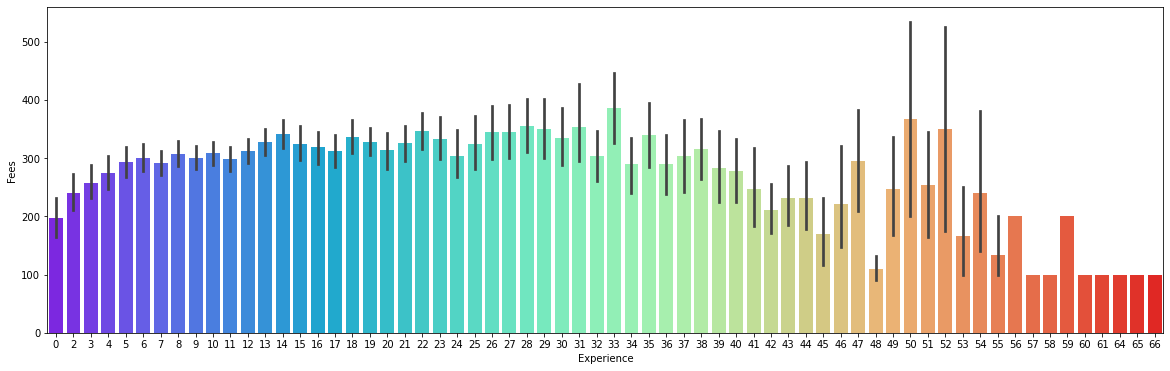

In [35]:
plt.figure(figsize=(20,6))
sns.barplot(x='Experience', y='Fees', data=train_data, palette='rainbow')
plt.show()

Observation:

From above graph, we can see that Experience-30 yrs have the highest Fees.

In [36]:
# Extract relevant qualification
train_data["Qualification"]=train_data["Qualification"].str.split(",")
Qualification ={}
for x in train_data["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [37]:
most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])
for title in final_qua:
    train_data[title]=0
    
for x,y in zip(train_data["Qualification"].values,np.array([idx for idx in range(len(train_data))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            train_data[q][y] = 1
train_data.drop("Qualification",axis=1,inplace=True)

In [38]:
train_data.head()

,Experience,Rating,Profile,Fees,City,Area,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100,Homeopath,100,Ernakulam,Kakkanad,0,0,0,1,0,0,0,0,0,1
1,12,98,Ayurveda,350,Bangalore,Whitefield,0,0,1,0,0,0,0,0,0,0
2,9,97,ENT Specialist,300,Bangalore,Mathikere - BEL,1,0,0,0,0,0,0,0,0,0
3,12,97,Ayurveda,250,Bangalore,Bannerghatta Road,0,0,1,0,0,0,0,0,0,0
4,20,100,Ayurveda,250,Chennai,Keelkattalai,0,0,1,0,0,0,0,0,0,0


#### Using OneHotCoding to convert the Profile, City column because itis nominal Categorical Data

In [39]:
# Converting Categorical to Numeric

profile = pd.get_dummies(train_data['Profile'], drop_first=True)
profile.head()

,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,0,0,0,0,1
1,0,0,0,0,0
2,0,0,1,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [40]:
# Converting Categorical to Numeric

city = pd.get_dummies(train_data['City'], drop_first=True)
city.head()

,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [41]:
# checking the uniqueness count in the Area
train_data.Area.value_counts()

HSR Layout              101
Andheri West             70
Dwarka                   68
Banjara Hills            64
Mulund West              54
                       ... 
Connaught Place           1
Dwarka Sector 10          1
Podanur                   1
Champapet                 1
Coimbatore Aerodrome      1
Name: Area, Length: 865, dtype: int64

In [42]:
# Define a function to create a doc of all Area seprataed by ','
def doc(series):
    text = ''
    for i in series:
        text += i + ','
    return text

In [43]:
from collections import Counter

train_data['Area'] = train_data['Area'].apply(str) # Convert int64 dtype to str type first
text = doc(train_data.Area)
area = pd.DataFrame.from_dict(dict(Counter(text.split(',')).most_common()), orient='index').reset_index()
area.columns=['Area','Count']
area.head(20)

,Area,Count
0,HSR Layout,101
1,Andheri West,70
2,Dwarka,68
3,Banjara Hills,64
4,Mulund West,54
5,Borivali West,52
6,Kandivali West,50
7,Indiranagar,48
8,Whitefield,47
9,Malleswaram,47


In [44]:
# Encoding the Area Code with the data
from sklearn.preprocessing import LabelEncoder
for i in ['Area']:
    col = i+"_code"
    train_data[col] = LabelEncoder().fit_transform(train_data[i])

In [45]:
train_data.head()

,Experience,Rating,Profile,Fees,City,Area,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,Area_code
0,24,100,Homeopath,100,Ernakulam,Kakkanad,0,0,0,1,0,0,0,0,0,1,296
1,12,98,Ayurveda,350,Bangalore,Whitefield,0,0,1,0,0,0,0,0,0,0,855
2,9,97,ENT Specialist,300,Bangalore,Mathikere - BEL,1,0,0,0,0,0,0,0,0,0,452
3,12,97,Ayurveda,250,Bangalore,Bannerghatta Road,0,0,1,0,0,0,0,0,0,0,68
4,20,100,Ayurveda,250,Chennai,Keelkattalai,0,0,1,0,0,0,0,0,0,0,335


In [46]:
# Adding our train_data, profile, City column into Train dataset

train = pd.concat([train_data, profile, city], axis=1)

In [47]:
train.head()

,Experience,Rating,Profile,Fees,City,Area,MBBS,BDS,BAMS,BHMS,...,ENT Specialist,General Medicine,Homeopath,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram
0,24,100,Homeopath,100,Ernakulam,Kakkanad,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,12,98,Ayurveda,350,Bangalore,Whitefield,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,9,97,ENT Specialist,300,Bangalore,Mathikere - BEL,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,12,97,Ayurveda,250,Bangalore,Bannerghatta Road,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,20,100,Ayurveda,250,Chennai,Keelkattalai,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [48]:
# drop Area columns as we already assigned the area Code

train.drop('Area',axis=1,inplace=True)

In [49]:
# dropping the City and Profile as WE used one hot coding technique

train.drop(['City', 'Profile'],axis=1,inplace=True)

### Missing Values

In [50]:
# Checking the missing values in train_data
train.isnull().sum()

Experience                              0
Rating                                  0
Fees                                    0
MBBS                                    0
BDS                                     0
BAMS                                    0
BHMS                                    0
MD - Dermatology                        0
MS - ENT                                0
Venereology & Leprosy                   0
MD - General Medicine                   0
Diploma in Otorhinolaryngology (DLO)    0
MD - Homeopathy                         0
Area_code                               0
Dentist                                 0
Dermatologists                          0
ENT Specialist                          0
General Medicine                        0
Homeopath                               0
 Chennai                                0
 Coimbatore                             0
 Delhi                                  0
 Ernakulam                              0
 Hyderabad                        

### Summary Statstics

In [51]:
train_data.describe()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,Area_code
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,95.948834,307.944640,0.470559,0.228485,0.127831,0.125482,0.101493,0.068948,0.049153,0.047811,0.041772,0.030364,410.013085
std,11.142798,5.373459,190.920373,0.499174,0.419892,0.333929,0.331293,0.302006,0.253387,0.216205,0.213384,0.200083,0.171601,255.117945
min,0.000000,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,97.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,195.000000
50%,14.000000,97.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,404.000000
75%,23.000000,97.000000,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,621.000000
max,66.000000,100.000000,950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,864.000000


Observation:
1. Min experience is 0 yrs and max is 60 yrs

2. max rating is 100 and min Rating is 7

3. Max Fees is 950 and min Fees is 5

4. For Experience, Fees mean is greater than median therefore data is right skewd for these attriutes

5. Mean is less than Median in Rating column so, data is left skewed

### Correlation

In [52]:
train.corr()

,Experience,Rating,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,ENT Specialist,General Medicine,Homeopath,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram
Experience,1.000000,-0.169021,0.002117,0.271347,-0.196268,-0.047150,-0.114191,-0.067704,0.093778,-0.120213,...,0.082435,0.335864,-0.070010,0.026078,-0.009287,0.059751,-0.008617,-0.054732,0.053884,-0.014791
Rating,-0.169021,1.000000,-0.123751,-0.228473,0.152869,0.065173,0.078914,-0.081063,-0.163399,-0.001590,...,-0.149778,-0.068794,0.071425,0.047188,0.036085,-0.026393,0.028397,-0.019896,0.041366,0.026288
Fees,0.002117,-0.123751,1.000000,0.271038,-0.198635,-0.139891,-0.002423,0.163811,0.128413,0.113091,...,0.155084,0.015463,-0.003072,-0.052178,-0.160503,0.143421,-0.101609,-0.000997,0.000925,-0.089157
MBBS,0.271347,-0.228473,0.271038,1.000000,-0.512244,-0.358911,-0.355083,0.314207,0.263449,0.213185,...,0.358680,0.499656,-0.375863,0.062971,-0.051322,0.022223,-0.053123,0.036254,-0.051340,-0.063328
BDS,-0.196268,0.152869,-0.198635,-0.512244,1.000000,-0.208341,-0.206141,-0.182900,-0.148092,-0.123730,...,-0.202977,-0.269357,-0.220862,0.033793,0.185212,-0.049813,0.091064,-0.003589,-0.065901,0.078242
BAMS,-0.047150,0.065173,-0.139891,-0.358911,-0.208341,1.000000,-0.145019,-0.128669,-0.104182,-0.087044,...,-0.142793,-0.186964,-0.153933,-0.077825,-0.076347,-0.034594,-0.020835,-0.019987,0.102361,0.021094
BHMS,-0.114191,0.078914,-0.002423,-0.355083,-0.206141,-0.145019,1.000000,-0.127311,-0.103082,-0.086124,...,-0.141285,-0.186217,0.930441,-0.048093,-0.062339,0.058755,-0.026255,-0.019823,0.035203,-0.011855
MD - Dermatology,-0.067704,-0.081063,0.163811,0.314207,-0.182900,-0.128669,-0.127311,1.000000,-0.091460,0.637946,...,-0.123660,-0.163558,-0.136402,0.003524,-0.040957,0.058088,0.001657,0.017416,-0.029916,-0.040663
MS - ENT,0.093778,-0.163399,0.128413,0.263449,-0.148092,-0.104182,-0.103082,-0.091460,1.000000,-0.061872,...,0.719488,-0.126366,-0.110443,0.007649,-0.023199,0.035332,0.001888,-0.013687,-0.014853,-0.032925
Venereology & Leprosy,-0.120213,-0.001590,0.113091,0.213185,-0.123730,-0.087044,-0.086124,0.637946,-0.061872,1.000000,...,-0.082433,-0.110584,-0.092275,0.002157,-0.017020,0.032576,0.002353,0.025972,-0.022928,-0.027508


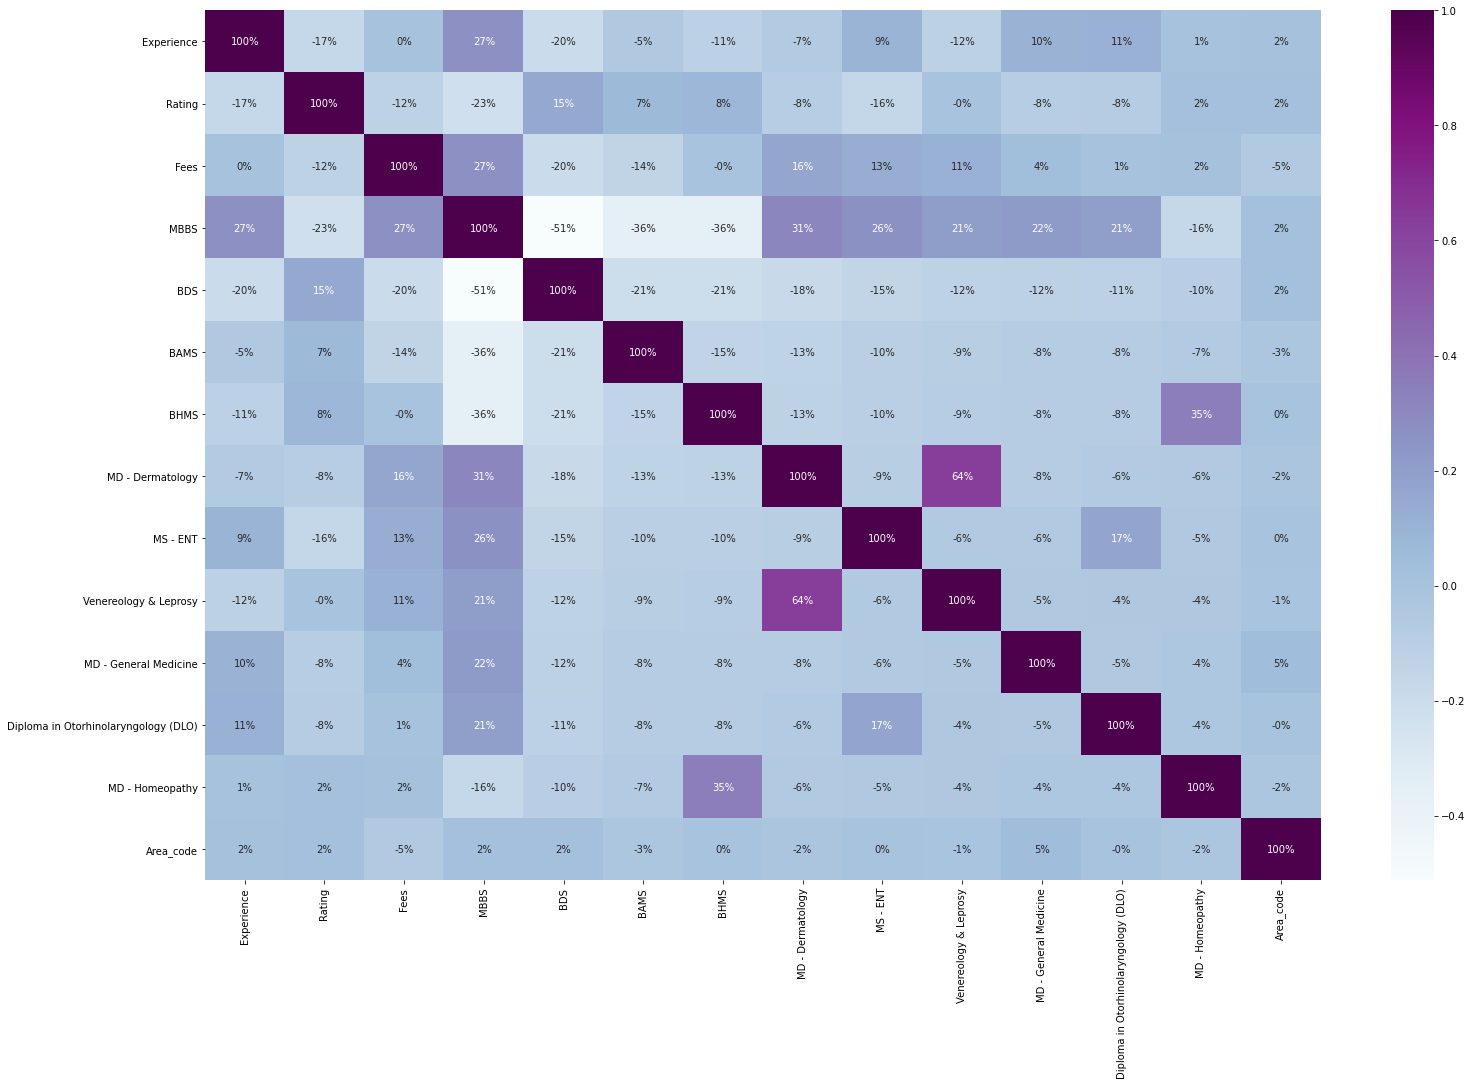

In [53]:
plt.figure(figsize=(25,16))
sns.heatmap(train_data.corr(), annot=True, fmt='.0%', cmap='BuPu')
plt.show()

Text(0.5, 1.0, 'Correlation with target variable')

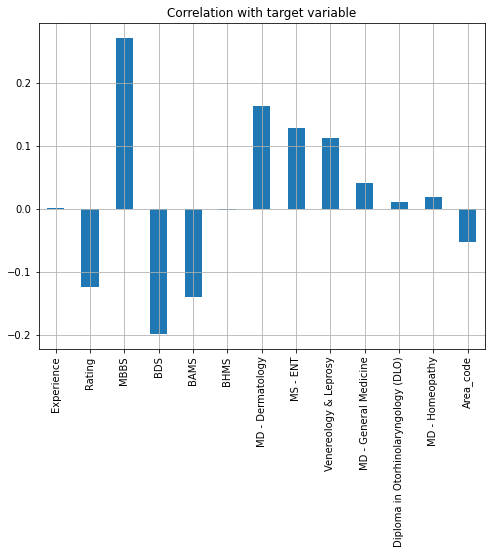

In [54]:
plt.figure(figsize=(8,6))
train_data.drop('Fees', axis=1).corrwith(train_data['Fees']).plot(kind='bar', grid=True)
plt.xticks(rotation=90)
plt.title('Correlation with target variable')

Observation: 
1. Rating, BDS Qualification and BAMS is highly negatively correlated with the Fees column and Fees column is not correlation with Experience
2. MBBS qualification is highly positively correlated with Fees Columns

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Experience                            5961 non-null   int32
 1   Rating                                5961 non-null   int32
 2   Fees                                  5961 non-null   int64
 3   MBBS                                  5961 non-null   int64
 4   BDS                                   5961 non-null   int64
 5   BAMS                                  5961 non-null   int64
 6   BHMS                                  5961 non-null   int64
 7   MD - Dermatology                      5961 non-null   int64
 8   MS - ENT                              5961 non-null   int64
 9   Venereology & Leprosy                 5961 non-null   int64
 10  MD - General Medicine                 5961 non-null   int64
 11  Diploma in Otorhinolaryngology (DLO)  5961 

### Missing values

In [56]:
# Checking the missing values in train_data
train_data.isnull().sum()

Experience                              0
Rating                                  0
Profile                                 0
Fees                                    0
City                                    0
Area                                    0
MBBS                                    0
BDS                                     0
BAMS                                    0
BHMS                                    0
MD - Dermatology                        0
MS - ENT                                0
Venereology & Leprosy                   0
MD - General Medicine                   0
Diploma in Otorhinolaryngology (DLO)    0
MD - Homeopathy                         0
Area_code                               0
dtype: int64

## Test Data

In [57]:
# checking the test dataset
print(test_data.head())
print('*'*80)

# check the shape of the test data
print(test_data.shape)
print('*'*80)

# Check the columns of the test data
print(test_data.columns)
print('*'*80)

# Checkign the null values in the test data
test_data.isnull().sum()

# Checking th percentage of the null values
print(round(test_data.isnull().sum()/len(test_data)*100,2))
print('*'*80)

# Checking the information of test_data
print(test_data.info())
print('*'*80)

# Checking the no. of Uniqueness in the object datatype of test dataset
for i in test_data.columns:
    if test_data[i].dtype == 'object':
        print('%s : %s' %(i, test_data[i].nunique()))
print('*'*80)

# Extracting the interger value from the Experience Column
test_data['Experience'] = test_data['Experience'].str.split().str[0].astype('int')

# Filling the Nan value with mode in Place
# Extract cities from Place column
test_data["Place"].fillna(test_data['Place'].mode()[0],inplace=True)

# Spliting the place into Area and City
test_data["Place"] = test_data["Place"].str.split(",")
test_data["City"] = test_data["Place"].str[-1]
test_data["Area"] = test_data["Place"].str[0]

# Check the uniqueness in City Column
print(test_data['City'].unique())
print('*'*80, '\n')

# Dropping the Place Column as it has not use
test_data.drop(['Place'], axis=1, inplace=True)

# checking the uniqueness in Rating columns
print(test_data['Rating'].unique())
print('*'*80, '\n')

# Filling the Nan value with negative value
test_data["Rating"].fillna("-50%",inplace=True)

# Removing the % symbol from the Rating column
test_data['Rating'] = test_data['Rating'].str[:-1].astype('int')

# # replacing the -50 with median of the Rating
test_data['Rating']= test_data['Rating'].replace(-50,np.nan)
test_data['Rating'] = test_data['Rating'].fillna(test_data['Rating'].median()).astype('int')
print(test_data['Rating'].unique())
print('*'*80, '\n')

# As the above Miscellaneous_Info is unwanted which is not related to Fees, So dropping the column
test_data.drop('Miscellaneous_Info',axis=1,inplace=True)


# Extract relevant qualification
test_data["Qualification"]=test_data["Qualification"].str.split(",")
Qualification ={}
for x in test_data["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])
for title in final_qua:
    test_data[title]=0
    
for x,y in zip(test_data["Qualification"].values,np.array([idx for idx in range(len(test_data))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            test_data[q][y] = 1
test_data.drop("Qualification",axis=1,inplace=True)

# Converting Categorical to Numeric
profile = pd.get_dummies(test_data['Profile'], drop_first=True)
print(profile.head())
print('*'*80, '\n')

city = pd.get_dummies(test_data['City'], drop_first=True)
print(city.head())
print('*'*80, '\n')

# Define a function to create a doc of all Area seprataed by ','
def doc(series):
    text = ''
    for i in series:
        text += i + ','
    return text

from collections import Counter

test_data['Area'] = test_data['Area'].apply(str) # Convert int64 dtype to str type first
text = doc(test_data.Area)
area = pd.DataFrame.from_dict(dict(Counter(text.split(',')).most_common()), orient='index').reset_index()
area.columns=['Area','Count']
area.head(20)

# Encoding the Area Code with the data
for i in ['Area']:
    col = i+"_code"
    test_data[col] = LabelEncoder().fit_transform(test_data[i])

# Adding our test_data, profile, City column into Train dataset
test = pd.concat([test_data, profile, city], axis=1)

# drop Area columns as we already assigned the area Code
test.drop('Area',axis=1,inplace=True)

# dropping the City and Profile as WE used one hot coding technique
test.drop(['City', 'Profile'],axis=1,inplace=True)

                                     Qualification           Experience  \
0                                             MBBS  35 years experience   
1       MBBS, Diploma in Otorhinolaryngology (DLO)  31 years experience   
2                                       MBBS, DDVL  40 years experience   
3                                             BAMS   0 years experience   
4  BDS, MDS - Conservative Dentistry & Endodontics  16 years experience   

  Rating                        Place           Profile  \
0    NaN       Ghatkopar East, Mumbai  General Medicine   
1    NaN  West Marredpally, Hyderabad    ENT Specialist   
2    70%            KK Nagar, Chennai    Dermatologists   
3    NaN       New Ashok Nagar, Delhi          Ayurveda   
4   100%    Kanakpura Road, Bangalore           Dentist   

                                  Miscellaneous_Info  
0                                                NaN  
1                                                NaN  
2                   70% 4 Fee

In [58]:
test.head()

,Experience,Rating,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,...,ENT Specialist,General Medicine,Homeopath,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram
0,35,97,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,31,97,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,40,70,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,97,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,16,100,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
print(train.shape, test.shape)

(5961, 26) (1987, 25)


### Removing the Outliers

In [60]:
from scipy.stats import zscore

z = np.abs(zscore(train))
z

array([[0.60097885, 0.75398471, 1.08926083, ..., 0.43568378, 0.50701532,
        0.12098883],
       [0.47604029, 0.38175374, 0.22029544, ..., 0.43568378, 0.50701532,
        0.12098883],
       [0.74529508, 0.19563825, 0.04161581, ..., 0.43568378, 0.50701532,
        0.12098883],
       ...,
       [2.12675597, 0.19563825, 1.52985171, ..., 0.43568378, 0.50701532,
        0.12098883],
       [0.20678551, 1.10717014, 1.08926083, ..., 0.43568378, 1.97232701,
        0.12098883],
       [0.02728232, 0.75398471, 0.56543832, ..., 0.43568378, 0.50701532,
        0.12098883]])

In [61]:
threshold =3

print(np.where(z>3))

(array([   0,    0,    8, ..., 5955, 5956, 5959], dtype=int64), array([12, 22, 10, ..., 12,  8, 10], dtype=int64))


In [62]:
new_train = train[(z<3).all(axis=1)]

In [63]:
print(new_train.shape, train.shape)

(4109, 26) (5961, 26)


In [64]:
train = new_train
train.shape

(4109, 26)

### Feature Selection

In [65]:
x = train.drop(columns=['Fees'], axis=1)
y = train['Fees']

In [66]:
# Encoding
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
x = enc.fit_transform(x)

In [67]:
# Scaling in input variables

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x = ss.fit_transform(x)

In [68]:
# Splitting the data into training and testing data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [69]:
# Importing the model library

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Importing all Boosting models
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# Import Error Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [70]:
model = [LinearRegression(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor(), Lasso(), Ridge(), ElasticNet(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()]

for m in model:
    print('\n*************** %s Model ***************\n' % m)
    m.fit(x_train, y_train)
    print('Score of %s Model is %s' % (m, m.score(x_train, y_train)))
    predm = m.predict(x_test)
    print('R2 Score: ',round(r2_score(y_test, predm)*100,2))
    print('MAE: %s' % (mean_absolute_error(y_test, predm)))
    print('MSE : ', mean_squared_error(y_test, predm))
    print('RMSE : ', np.sqrt(mean_squared_error(y_test, predm)))


*************** LinearRegression() Model ***************

Score of LinearRegression() Model is 0.12382849444860844
R2 Score:  10.79
MAE: 136.0023269104739
MSE :  28255.338650255788
RMSE :  168.09324391615442

*************** SVR() Model ***************

Score of SVR() Model is 0.06083332567146149
R2 Score:  6.11
MAE: 134.86622707719857
MSE :  29737.782554046018
RMSE :  172.44646286324928

*************** DecisionTreeRegressor() Model ***************

Score of DecisionTreeRegressor() Model is 0.990600506858861
R2 Score:  -54.43
MAE: 158.61313868613138
MSE :  48911.800486618005
RMSE :  221.16012408799648

*************** KNeighborsRegressor() Model ***************

Score of KNeighborsRegressor() Model is 0.3545866215674217
R2 Score:  -1.16
MAE: 140.05474452554745
MSE :  32040.47333333333
RMSE :  178.99852885801417

*************** Lasso() Model ***************

Score of Lasso() Model is 0.12329518442297716
R2 Score:  10.91
MAE: 136.09998855370097
MSE :  28216.785307483617
RMSE :  167.97

In [71]:
# Cross_val_score

model = [LinearRegression(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor(), Lasso(), Ridge(), ElasticNet(), RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()]

for m in model:
    print('\n*************** %s Model ***************\n' % m)
    cv_score = cross_val_score(m, x, y, cv=5, scoring = 'r2')
    print('Score of %s Model is %s' % (m, cv_score))
    print('Mean score: ', cv_score.mean())
    print('Std score : ', cv_score.std())
    print('Min score : ', cv_score.min())
    print('Max score : ', cv_score.max())


*************** LinearRegression() Model ***************

Score of LinearRegression() Model is [0.12394938 0.0980021  0.1256652  0.1022622  0.11932094]
Mean score:  0.1138399609134726
Std score :  0.01146263636490795
Min score :  0.09800209573811824
Max score :  0.12566519674288568

*************** SVR() Model ***************

Score of SVR() Model is [0.05663389 0.03376331 0.07873646 0.02952762 0.06613379]
Mean score:  0.05295901385137132
Std score :  0.018809899888987472
Min score :  0.029527620762465623
Max score :  0.07873646234609144

*************** DecisionTreeRegressor() Model ***************

Score of DecisionTreeRegressor() Model is [-0.62425066 -0.66492951 -0.5602433  -0.57096525 -0.61351134]
Mean score:  -0.6067800137546844
Std score :  0.03789527912134596
Min score :  -0.664929510875391
Max score :  -0.5602433042791417

*************** KNeighborsRegressor() Model ***************

Score of KNeighborsRegressor() Model is [ 0.03000414 -0.01727003  0.07374085  0.03893028  0.05

#### Best model is GradientBoostingRegressor

In [72]:
# gridSearchCV for GradientBoostingRegressor
params = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]}

gbr = GradientBoostingRegressor()

clf = GridSearchCV(gbr, params)
clf.fit(x, y)
print('Best Parameters: ', clf.best_params_)

Best Parameters:  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.5}


In [77]:
gbr = GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=500, subsample=0.5)

gbr.fit(x_train, y_train)
print('Score of %s Model is %s' % (gbr, gbr.score(x_train, y_train)))
predgbr = gbr.predict(x_test)
print('R2 Score: ',round(r2_score(y_test, predgbr)*100,2))
print('MAE: ' ,mean_absolute_error(y_test, predgbr))
print('MSE : ', mean_squared_error(y_test, predgbr))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, predgbr)))

Score of GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=500,
                          subsample=0.5) Model is 0.46458551786899926
R2 Score:  18.0
MAE:  127.70593769249213
MSE :  25971.0230617127
RMSE :  161.15527624534266


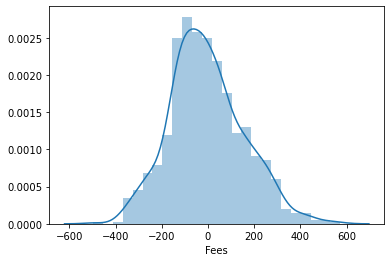

In [78]:
sns.distplot(y_test-predgbr)
plt.show()

In [79]:
# Saving the predicted value to .csv

prediction = pd.DataFrame(predgbr, columns=['Predictions']).to_csv('Data/Predicted_doctor_consultation_fees.csv')

In [80]:
# Saving RandomForestRegressor

import joblib
joblib.dump(gbr, 'gbr_doctor_consultation_fees.pkl')

['gbr_doctor_consultation_fees.pkl']